# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this kernel I analyzed this dataset which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>List of column names:
* id - movie identification number
* imdb_id - unique number for movie identification
* popularity - popularity ratings as a float value
* budget - amount of money spent in the entire process
* revenue - amount of money earned/generated from a movie
* original_title - the name of a movie
* cast - the name of actors in a movie
* homepage - url address to the movie webpage
* director - the creative leads of the movie
* tagline - unique slogan for the movie
* keywords - a word attached to the movie tittle
* overview - a brief description of the movie
* runtime - total time the movie runs as an int value
* genres - categories that define the movie
* production_companies - a list of companies that produced the movie
* release_date - the date the movie was released in date format
* vote_count - total votes a movie received as an int value
* vote_average - average of vote counts as a float value 
* release_year - the year the movie was released
* budget_adj - the budget adjustment for the associated movie
* revenue_adj - the revenue adjustment for the associated movie



### Question(s) for Analysis
The purpose of the analysis is to find answers for the following questions.
1. Which movies had the highest budget?
2. Which movies generated the highest revenue?
3. Which year has the highest release of movies?
4. Is there a correlation between vote count and budget of the movie?
5. Is there a correlation between popularity and the revenue generated?

In [1]:
# import the required packages and magic word  -- for plotting visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.9MB/s eta 0:00:01 1% |▌                               | 163kB 8.5MB/s eta 0:00:02    13% |████▎                           | 1.4MB 26.5MB/s eta 0:00:01    67% |█████████████████████▌          | 7.0MB 28.1MB/s eta 0:00:01    93% |██████████████████████████████  | 9.8MB 30.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01   14% |████▋                           | 1.9MB 25.8MB/s eta 0:00:01    33% |██████████▊                     | 4.5MB 26.9MB/s eta 0:00:01    52% |████████████████▉               | 7.0MB 26.6MB/s eta 0:00:01    71% |███████████████████████         | 9.6MB 26.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstall

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Reading data using pandas read_csv() function
tmdb = pd.read_csv('tmdb-movies.csv')

In [3]:
# Print out first few lines to inspect data
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# checking the number of rows and columns in dataset -- dimension of the data
tmdb.shape

(10866, 21)

In [6]:
#checking statistics about the data
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# inspecting datatypes in the dataset
tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
#checking the datatypes further and non values in the data
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
#checking for unique values and sum of unique values in the data
print(tmdb.nunique())
tmdb.nunique().sum()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


119205

In [10]:
#prints out columns containing nulls and sum of null values
print(tmdb.isnull().sum())
tmdb.isnull().sum().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


13434

In [11]:
#prints out the number of duplicate rows
sum(tmdb.duplicated())

1

### Findings from Assesing the Dataset
> After inspecting the data types and looking for instances of missing or possibly errant data I found out:
1. There is one duplicate row in the dataset.
2. There are columns not useful in answering questions posed for this analysis.
3. There are missing values in the following columns:['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genre', 'production_companies'] 



## Data Cleaning
>The dimension of the data is 10866 rows and 12 columns. It contains one duplicated row of data which I will drop since it does not have a big impact on my analysis. The column names are well structured with lowercase and underscore seperating a column name which is easy to work with, I won't be renaming them. Some columns are extraneous and aren't relevant to our questions and not particularly useful in finding trends, so I'll have to remove them.
 

### Duplicate data -- drop duplicates

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# dropping duplicate entries
tmdb.drop_duplicates(inplace=True)

In [14]:
# checkind dimension of data to see if duplicate has been dropped successfully
tmdb.shape

(10865, 21)

In [15]:
# checking if there are any duplicates in the data
sum(tmdb.duplicated())

0

### Drop Extraneous Columns

In [16]:
# Dropping columns that aren't relevant to our questions
tmdb.drop(['homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'imdb_id'], axis=1, inplace=True)
tmdb.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [17]:
#checking the dimension of the data to see number of remaining columns
tmdb.shape

(10865, 15)

In [18]:
#checking to see remaining columns after dropping columns that are not relevant
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


### Missing data

In [19]:
# view missing value count for each feature in dataset
tmdb.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In the remaining columns, three have null values i.e. cast, director and genres. I will perform operations to inspect the values in the rows and see the impact on my analysis if the rows are deleted.

In [20]:
# checking values in rows where cast is null
tmdb[tmdb.cast.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,47,6.9,2015,0.000000e+00,0.000000e+00
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,10/9/15,37,8.2,2015,0.000000e+00,0.000000e+00
465,321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,1/24/15,19,7.8,2015,0.000000e+00,0.000000e+00
536,333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,10/8/15,12,8.0,2015,0.000000e+00,0.000000e+00
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,1/1/15,11,8.9,2015,0.000000e+00,0.000000e+00
587,319091,0.062536,0,0,The Hunting Ground,NaN,Kirby Dick,103,Documentary,2/27/15,39,7.8,2015,0.000000e+00,0.000000e+00
600,332479,0.047256,0,0,Star Wars: TIE Fighter,NaN,Paul Johnson,7,Science Fiction|Action|Animation,3/24/15,29,7.6,2015,0.000000e+00,0.000000e+00
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015,0.000000e+00,0.000000e+00
1088,169607,0.226028,0,1503616,Finding Vivian Maier,NaN,John Maloof|Charlie Siskel,83,Documentary,3/28/14,70,7.8,2014,0.000000e+00,1.384967e+06
1173,261041,0.159037,0,0,The Search for General Tso,NaN,Ian Cheney,71,Documentary,4/20/14,14,6.9,2014,0.000000e+00,0.000000e+00


My question for analysis is focusing on using the values in the budget and revenue column to draw conclusions about the data. But upon investigating the two columns in the printout for non values for the cast column, the revenue, budget, revenue_adj, budjet_adj columns have zero(0) values and the rows are only 76 in number. I will drop the rows since they won't affect my analysis.

In [21]:
# checking values in rows where director is null
tmdb[tmdb.director.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,75,Documentary,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,94,Documentary,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,100,Drama,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,133,Drama|Family|Foreign,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


My question for analysis is focusing on using the values in the budget and revenue column to draw conclusions about the data. But, upon investigating the two columns in the printout for non values for the director column, the revenue, budget, revenue_adj, budjet_adj columns have zero(0) values and the rows are only 44 in number. I will drop the rows since they won't affect my analysis.

In [22]:
# checking values in rows where genres is null
tmdb[tmdb.genres.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


My question for analysis is focusing on using the values in the budget and revenue column to draw conclusions about the data. But, upon investigating the two columns in the printout for non values for genres column, the revenue, budget, revenue_adj, budjet_adj columns have zero(0) values and the rows are only 23 in number. I will drop the rows since they won't affect my analysis.

In [23]:
# dropping rows containing null values
tmdb.dropna(inplace = True)

In [24]:
# checks if any of columns in the dataset have null values
tmdb.isnull().sum().any()

False

In [25]:
# checking if rows containing null values were successfully dropped
tmdb.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [26]:
#checking the datatypes in the dataset
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which movies had the highest budget?

#### Describe features

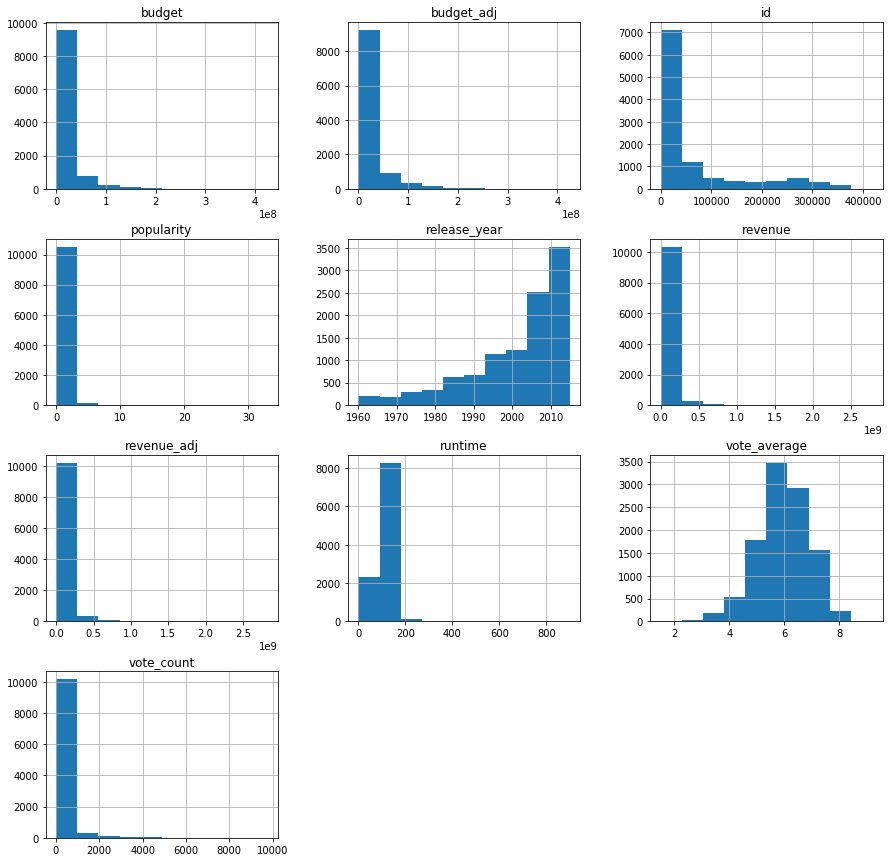

In [27]:
# explore data - visualize with histogram
tmdb.hist(figsize=(15,15));

>Features like budjet, budget_adj, id, popularity, revenue, revenue_adj, vote_count are skewed to the right. Runtime has a zero skew, while release_year and vote_average are skewed to the left.

In [28]:
#printing out the top 10 movies according to their budget in descending order
top_movies = tmdb[['original_title', 'budget']].sort_values(by='budget', ascending=False).head(10)
top_movies

,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000
4411,John Carter,260000000
1929,Tangled,260000000
7394,Spider-Man 3,258000000
5508,The Lone Ranger,255000000
1389,Harry Potter and the Half-Blood Prince,250000000


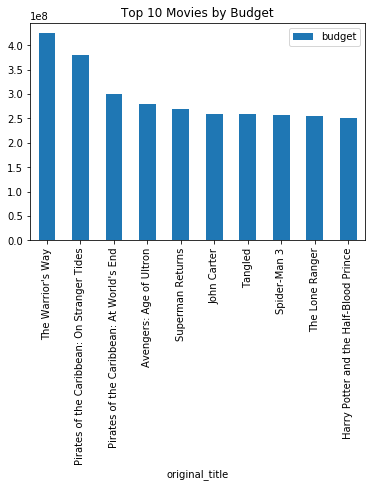

In [29]:
#drawing a bar chart to visualize the budget of top 10 movies in descending order
top_movies.set_index('original_title').plot(kind ='bar')
plt.title('Top 10 Movies by Budget');

>In the above cells I have printed the top 10 movies sorted by budget in descending order and also visualized a bar chart

### Research Question 2: Which movies generated the highest revenue?

In [31]:
# #printing out the top 10 revenue generating movies according to their budget in descending order
top_revenue = tmdb[['original_title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
top_revenue

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


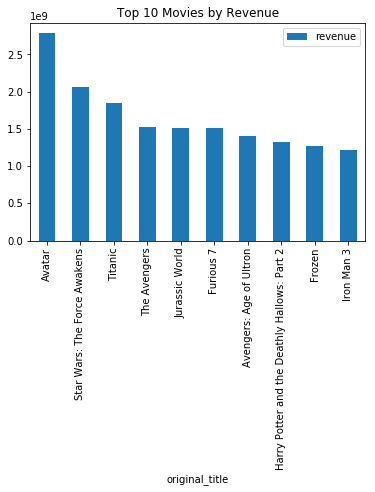

In [32]:
#drawing a bar chart to visualize the revenue generated by top 10 movies in descending order
top_revenue.set_index('original_title').plot(kind='bar')
plt.title('Top 10 Movies by Revenue');

>In the above cells I have printed the top 10 revenue generating movies sorted by revenue in descending order and also visualized a bar chart

### Research Question 3: Which year has the highest release of movies?

In [33]:
#count the number of movies released each year 
h_release = tmdb.groupby('release_year').count()['id']
h_release.head(10)

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
1965    35
1966    46
1967    38
1968    38
1969    30
Name: id, dtype: int64

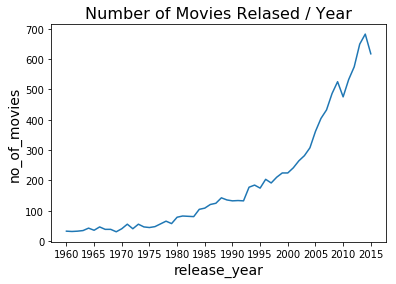

In [34]:
#plotting a line graph showing the number of movies released each year
h_release.plot(xticks = np.arange(1960,2016,5))
plt.title("Number of Movies Relased / Year",fontsize = 16)
plt.xlabel('release_year',fontsize = 14)
plt.ylabel('no_of_movies',fontsize = 14);

In the above cells I have printed the number of movies released each year and also visualized a line graph

### Research Question 3: Is there a correlation between vote count and budget of the movie?

In [117]:
def drawScatterPlots(data, x_values, y_values):

    '''
    This function will draw a scatter plots 

    Parameters : Takes values of two columns from a dataframe
    
    '''

    # plot the scatter plot
    data.plot(kind = 'scatter', x = x_values, y = y_values, figsize = [16, 6], s=7, color='DarkGreen');

    # add tittle to the plot 
    plt.title(f'Relationship between {y_values} and {x_values}'.title(), fontsize = 16, weight = "bold")
    
    # add y label to the plot
    plt.ylabel(y_values.title(), fontsize = 10, weight = "bold")
    
    # add x label to the plot
    plt.xlabel(x_values.title(), fontsize = 12, weight = "bold")

>Alternative code to draw a scatterplot without using a function
>describe the correlation between vote_count and the budget
>tmdb.plot(x='vote_count', y='budget',kind='scatter')
>plt.title('Correlation between vote_count and budget')
>plt.show();

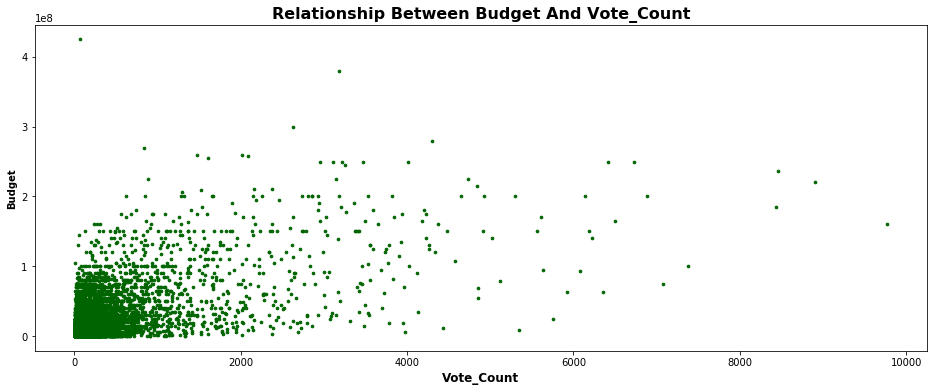

In [118]:
# call plot function drawScatterPlots to draw the relationship between budget and vote count
drawScatterPlots(tmdb, 'vote_count', 'budget')

>The scatterplot above indicates no correlation between vote count and budget for the movie the because values are scattered randomly forming no line

### Research Question 4: Is there a correlation between popularity and the revenue generated?

>Alternative code to draw a scatterplot without using a function
>describe the correlation between vote_count and the budget
>tmdb.plot(x='popularity', y='revenue',kind='scatter')
>plt.title('Correlation between popularity and revenue')
>plt.show();

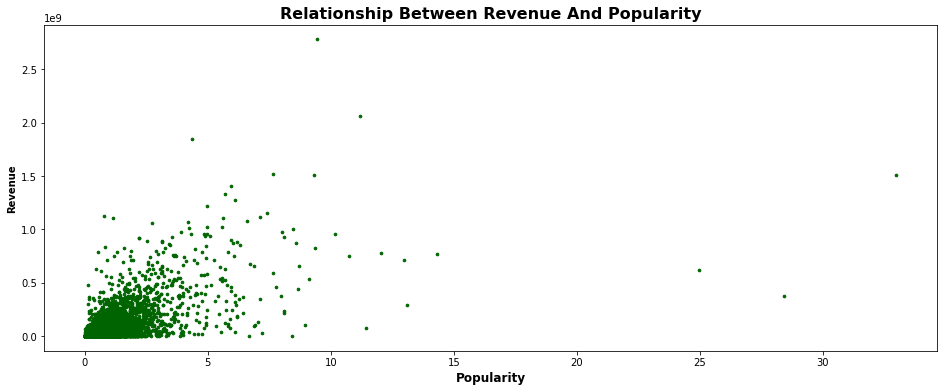

In [116]:
# call plot function drawScatterPlots to draw the relationship between revenue and popularity
drawScatterPlots(tmdb, 'popularity', 'revenue')

>The scatterplot above indicates no correlation between popularity and revenue the movie generated because values are scattered randomly forming no line

<a id='conclusions'></a>
## Conclusions
1. From the line plot for question 3 we can conclude that the year 2014 has the highest release of movies followed by 2013 and the year 2015.
2. From the scatter plots for question 3 and 4, the visualization plotted shows that there is no correlation between popularity and the revenue generated and also no correlation between vote count and budget of the movies.
3. From the plot for question 2 movies that generated the highest revenue are Avatar, Star Wars: The Force Awakens, Titanic, The Avengers and Jurassic World. 	

### Limitations

Limitations the dataset inludes; the data contains null values in some features and a duplicate row. Null values hinders analysis and have to be removed and the duplicate row also has to be dropped.


In [119]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

In [4]:
zip -r workspace.zip.

SyntaxError: invalid syntax (<ipython-input-4-672f55b374ba>, line 1)